In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

housing = pd.read_csv("Data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
# Checking for null values
print(housing.info())

# Checking for outliers
print(housing.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [3]:
# Creating dummy variable
status = pd.get_dummies(housing['ocean_proximity'])

# Check what the dataset 'status' looks like
status

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [4]:
# Dropping the first column from status dataset
status = pd.get_dummies(housing['ocean_proximity'], drop_first = True)

# Adding the status to the original housing dataframe
housing = pd.concat([housing, status], axis = 1)

# Dropping 'furnishingstatus' as we have created the dummies for it
housing.drop(['ocean_proximity'], axis = 1, inplace = True)

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


In [5]:
housing = housing.drop(['longitude', 'latitude'], axis=1)
housing

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


In [6]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households','median_income','median_house_value']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3472,0.490196,0.114605,0.094381,0.047955,0.095081,0.606019,0.859380,False,False,False,False
13593,0.745098,0.039736,0.064421,0.035175,0.058562,0.068254,0.112373,True,False,False,False
3507,0.627451,0.034267,0.037876,0.020600,0.038164,0.316878,0.402681,False,False,False,False
6780,0.745098,0.097815,0.134120,0.051683,0.136042,0.203859,0.721442,False,False,False,False
8087,0.901961,0.059427,0.067370,0.034082,0.068597,0.331699,0.401856,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
16734,0.686275,0.091175,0.126048,0.046134,0.123705,0.198735,0.491546,False,False,True,False
16304,0.274510,0.061538,0.048432,0.028392,0.051160,0.655777,0.468041,True,False,False,False
79,0.725490,0.017121,0.026855,0.009557,0.025004,0.104240,0.239795,False,False,True,False
12119,0.039216,0.466687,0.393356,0.236386,0.384767,0.354547,0.376702,True,False,False,False


In [8]:
# Dividing the training data set into X and Y
y_train = df_train.pop('median_house_value')
X_train = df_train

In [9]:
# Convert boolean columns to int (True → 1, False → 0)
bool_cols = ['INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
X_train[bool_cols] = X_train[bool_cols].astype(int)

X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Add constant and fit OLS
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_lm).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     2406.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:34:09   Log-Likelihood:                 7287.0
No. Observations:               14312   AIC:                        -1.455e+04
Df Residuals:                   14301   BIC:                        -1.447e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0665      0

In [10]:
#print(y_train.dtypes)

In [11]:
#print(X_train.dtypes)

In [12]:
#Build a linear model

#import statsmodels.api as sm
#X_train_lm = sm.add_constant(X_train)

#lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()

#lr_1.summary()

In [13]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,households,89.12
2,total_bedrooms,85.14
1,total_rooms,27.79
3,population,15.44
5,median_income,4.16
0,housing_median_age,3.78
6,INLAND,1.49
8,NEAR BAY,1.34
9,NEAR OCEAN,1.26
7,ISLAND,1.00


In [14]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('households', axis=1)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2651.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:34:09   Log-Likelihood:                 7249.2
No. Observations:               14312   AIC:                        -1.448e+04
Df Residuals:                   14302   BIC:                        -1.440e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0654      0

In [15]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,total_rooms,27.74
2,total_bedrooms,27.00
3,population,11.77
4,median_income,4.13
0,housing_median_age,3.77
5,INLAND,1.47
7,NEAR BAY,1.34
8,NEAR OCEAN,1.26
6,ISLAND,1.00


In [16]:
X = X_train.drop('total_rooms', axis=1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2656.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:34:09   Log-Likelihood:                 7257.7
No. Observations:               14312   AIC:                        -1.450e+04
Df Residuals:                   14302   BIC:                        -1.442e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0807      0

In [17]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,households,88.98
1,total_bedrooms,66.85
2,population,14.51
0,housing_median_age,3.09
4,median_income,2.95
5,INLAND,1.47
7,NEAR BAY,1.34
8,NEAR OCEAN,1.26
6,ISLAND,1.00


In [18]:
X_train.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [19]:
X = X_train.drop(columns=['households', 'total_bedrooms', 'population'])

#X = X_train.drop('total_rooms', axis=1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2989.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:34:09   Log-Likelihood:                 6676.3
No. Observations:               14312   AIC:                        -1.334e+04
Df Residuals:                   14304   BIC:                        -1.328e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0922      0

In [20]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,median_income,3.37
0,housing_median_age,2.99
1,total_rooms,2.30
3,INLAND,1.46
5,NEAR BAY,1.32
6,NEAR OCEAN,1.25
4,ISLAND,1.00


In [21]:
#X = X.drop('basement', 1)
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2989.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:34:09   Log-Likelihood:                 6676.3
No. Observations:               14312   AIC:                        -1.334e+04
Df Residuals:                   14304   BIC:                        -1.328e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0922      0

In [22]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,median_income,3.37
0,housing_median_age,2.99
1,total_rooms,2.30
3,INLAND,1.46
5,NEAR BAY,1.32
6,NEAR OCEAN,1.25
4,ISLAND,1.00


/var/folders/9j/ck4ghkj915q59nnl_d5wvg4h0000gn/T/ipykernel_10873/851818499.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

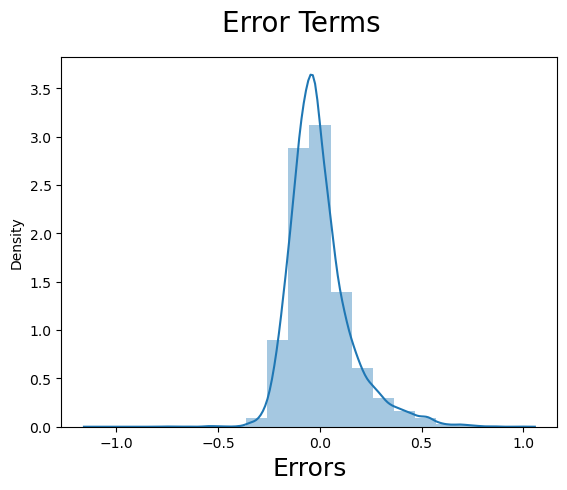

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
y_train_price = lr_4.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [24]:
num_vars = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households','median_income','median_house_value']
#num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test2 = df_test.copy()

In [25]:
df_test.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [26]:
y_test = df_test.pop('median_house_value')
X_test = df_test

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m4 = X_test_m4.drop(['households', 'total_bedrooms', 'population'], axis = 1)

# Making predictions using the final model
y_pred_m4 = lr_4.predict(X_test_m4)

In [27]:
df_test

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8151,0.686275,0.027983,0.028097,0.012360,0.028623,0.220907,False,False,False,False
53,1.000000,0.041186,0.070320,0.032484,0.065307,0.051558,False,False,True,False
3039,0.235294,0.114885,0.110214,0.060736,0.109886,0.298389,True,False,False,False
9484,0.352941,0.025821,0.031357,0.011800,0.024511,0.164370,True,False,False,False
9307,0.588235,0.166476,0.243403,0.082934,0.240336,0.164853,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
11584,0.490196,0.135084,0.137535,0.082093,0.146899,0.371822,False,False,False,False
2767,0.274510,0.049200,0.082738,0.014350,0.044415,0.104205,True,False,False,False
9481,0.333333,0.071485,0.097020,0.045769,0.100674,0.126440,False,False,False,False
2258,0.666667,0.047343,0.055883,0.029457,0.060207,0.194984,True,False,False,False


In [28]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m4)

0.6156354841823531

In [29]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize model
lm = LinearRegression()

# Recursive Feature Elimination
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# Show feature rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('housing_median_age', True, 1),
 ('total_rooms', True, 1),
 ('total_bedrooms', True, 1),
 ('population', True, 1),
 ('households', True, 1),
 ('median_income', True, 1),
 ('INLAND', True, 1),
 ('ISLAND', True, 1),
 ('NEAR BAY', True, 1),
 ('NEAR OCEAN', True, 1)]

In [31]:
# Get selected columns from RFE
col = X_train.columns[rfe.support_]

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     2406.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:34:10   Log-Likelihood:                 7287.0
No. Observations:               14312   AIC:                        -1.455e+04
Df Residuals:                   14301   BIC:                        -1.447e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0665      0

In [32]:
X_train_new = X_train_rfe.drop(columns=['households', 'total_bedrooms', 'population'])

#X = X_train.drop(columns=['households', 'total_bedrooms', 'population'])

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2989.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:34:10   Log-Likelihood:                 6676.3
No. Observations:               14312   AIC:                        -1.334e+04
Df Residuals:                   14304   BIC:                        -1.328e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0922      0

In [33]:
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,median_income,3.37
0,housing_median_age,2.99
1,total_rooms,2.30
3,INLAND,1.46
5,NEAR BAY,1.32
6,NEAR OCEAN,1.25
4,ISLAND,1.00


In [34]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns


y_train_price = lm.predict(X_train_lm)
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Error term
errors = y_train - y_train_price

# Plotting histogram using histplot instead of distplot
fig = plt.figure()
sns.histplot(errors, bins=20, kde=True)  # `kde=True` if you want a smooth density curve
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

Text(0.5, 0, 'Errors')

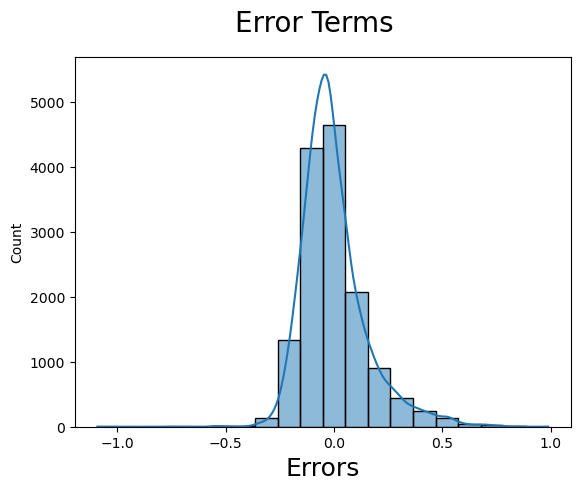

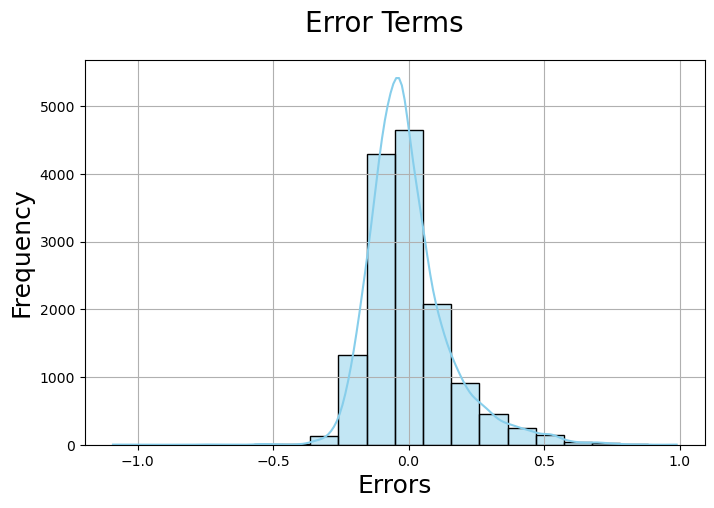

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate prediction and residuals
y_train_price = lm.predict(X_train_lm)
errors = y_train - y_train_price

# Plot
fig = plt.figure(figsize=(8, 5))  # Optional: Set figure size
sns.histplot(errors, bins=20, kde=True, color='skyblue')  # KDE makes it smooth

# Add titles and labels
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.grid(True)
plt.show()

In [38]:
df_test

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8151,0.686275,0.027983,0.028097,0.012360,0.028623,0.220907,False,False,False,False
53,1.000000,0.041186,0.070320,0.032484,0.065307,0.051558,False,False,True,False
3039,0.235294,0.114885,0.110214,0.060736,0.109886,0.298389,True,False,False,False
9484,0.352941,0.025821,0.031357,0.011800,0.024511,0.164370,True,False,False,False
9307,0.588235,0.166476,0.243403,0.082934,0.240336,0.164853,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
11584,0.490196,0.135084,0.137535,0.082093,0.146899,0.371822,False,False,False,False
2767,0.274510,0.049200,0.082738,0.014350,0.044415,0.104205,True,False,False,False
9481,0.333333,0.071485,0.097020,0.045769,0.100674,0.126440,False,False,False,False
2258,0.666667,0.047343,0.055883,0.029457,0.060207,0.194984,True,False,False,False


In [39]:
scaler = MinMaxScaler()

num_vars = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households','median_income','median_house_value']

df_test2[num_vars] = scaler.fit_transform(df_test2[num_vars])

df_test2

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8151,0.686275,0.040039,0.033776,0.029140,0.035707,0.220907,0.466596,False,False,False,False
53,1.000000,0.058777,0.083979,0.076908,0.080949,0.051558,0.171099,False,False,True,False
3039,0.235294,0.163369,0.131414,0.143969,0.135930,0.298389,0.259057,True,False,False,False
9484,0.352941,0.036970,0.037652,0.027809,0.030635,0.164370,0.275811,True,False,False,False
9307,0.588235,0.236587,0.289775,0.196660,0.296815,0.164853,0.631831,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
11584,0.490196,0.192036,0.163898,0.194664,0.181578,0.371822,0.450470,False,False,False,False
2767,0.274510,0.070149,0.098745,0.033863,0.055184,0.104205,0.066597,True,False,False,False
9481,0.333333,0.101776,0.115725,0.108443,0.124569,0.126440,0.128796,False,False,False,False
2258,0.666667,0.067514,0.066814,0.069723,0.074660,0.194984,0.090262,True,False,False,False


In [41]:
y_test = df_test2.pop('median_house_value')
X_test = df_test2

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m4 = X_test_m4.drop(['households', 'total_bedrooms', 'population'], axis = 1)

# Making predictions using the final model
y_pred_m4 = lr_4.predict(X_test_m4)

In [42]:
r2_score(y_true = y_test, y_pred = y_pred_m4)

0.6090724691477266